In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import keras
import tensorflow
from keras import Sequential
from keras.layers import Dense

df = pd.read_csv('income_evaluation.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# New Section

In [0]:
cleanedData = []
for index, row in X.iterrows():
    cur = []
    # Age column
    cur.append(int(row["age"]))
    # Workclass column
    if row[" workclass"] == "Private":
        cur += [1, 0, 0]
    elif row[" workclass"] == "Self-emp-not-inc":
        cur += [0, 1, 0]
    elif row[" workclass"] != "Private" and row[" workclass"] != "Self-emp-not-inc":
        cur += [0, 0, 1]
    # fnlwgt column
    cur.append(int(row[" fnlwgt"]))
    # education column
    if row[" education"] == "HS-grad":
        cur += [1, 0, 0]
    elif row[" education"] == "Some-college":
        cur += [0, 1, 0]
    elif row[" education"] != "HS-grad" and row[" education"] != "Some-college":
        cur += [0, 0, 1]
    # marital-status column
    if row[" marital-status"] == "Married-civ-spouse":
        cur += [1, 0, 0]
    elif row[" marital-status"] == "Never-married":
        cur += [0, 1, 0]
    elif row[" marital-status"] != "Married-civ-spouse" and row[" marital-status"] != "Never-married":
        cur += [0, 0, 1]
    # occupation column
    # relationship column
    if row[" relationship"] == "Husband":
        cur += [1, 0, 0]
    elif row[" relationship"] == "Not-in-family":
        cur += [0, 1, 0]
    elif row[" relationship"] != "Husband" and row[" relationship"] != "Not-in-family":
        cur += [0, 0, 1]
    # race column
    if row[" race"] == "White":
        cur += [1, 0, 0]
    elif row[" race"] == "Black":
        cur += [0, 1, 0]
    elif row[" race"] != "White" and row[" race"] != "Black":
        cur += [0, 0, 1]
    # sex column
    if row[" sex"] == "Female":
        cur += [0, 1]
    elif row[" sex"] != "Female":
        cur += [1, 0]
    # capital gain column
    cur.append(int(row[" capital-gain"]))
    # capital loss column
    cur.append(int(row[" capital-loss"]))
    # hours-per-week column
    cur.append(int(row[" hours-per-week"]))

    cleanedData.append(cur)

In [0]:
targetData = []
for index, row in df.iterrows():
    if str(row[" income"]).strip() == "<=50K":
        targetData.append(0)
    if str(row[" income"]).strip() == ">50K":
        targetData.append(1)

In [0]:
print(len(cleanedData), len(cleanedData[0]))
print(len(targetData))

32561 22
32561


In [0]:
import csv
arr = []
for index in range(len(cleanedData)):
    arr.append(cleanedData[index] + [targetData[index]])

f = open("CleanedData.csv", "a")
writer = csv.writer(f)
writer.writerows(arr)
f.close()

In [0]:
df = pd.read_csv('./CleanedData.csv')
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [0]:
# Create a null model
def create_model_null():
    model = Sequential()
    model.add(Dense(64, input_dim = 22, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    return model

In [0]:
# Create a model with assigned weights and bias
def create_model(w1,b1,w2,b2):
    L = [w1,b1,w2,b2]
    np.asarray(L)
    model = Sequential()
    model.set_weights(L)
    model.add(Dense(64, input_dim = 22, activation = 'sigmoid'))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

In [0]:
# Create initial random weights and bias
def create_initial_random():
    w1 = np.random.rand(22,64) * np.random.rand(1,1) 
    b1 = np.random.rand(1,64) * np.random.rand(1,1) 
    w2 = np.random.rand(64,1) * np.random.rand(1,1) 
    b2 = np.random.rand(1,1) * np.random.rand(1,1) 
    return w1,b1,w2,b2

In [0]:
# Create random velocity for different population
def create_initial_velocity():
    v_w1 = np.random.rand(22,64) * np.random.rand(1,1) + (np.random.rand(1,1)-1)
    v_b1 = np.random.rand(1,64) * np.random.rand(1,1) + (np.random.rand(1,1)-1)
    v_w2 = np.random.rand(64,1) * np.random.rand(1,1) + (np.random.rand(1,1)-1)
    v_b2 = np.random.rand(1,1) * np.random.rand(1,1) + (np.random.rand(1,1)-1)
    return v_w1,v_b1,v_w2,v_b2

In [0]:
def fitness_function(X,Y,w1,b1,w2,b2):
    m = create_model(w1,b1,w2,b2)
    m.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
    accr = m.test_on_batch(X,Y,sample_weight=None,reset_metrics=True)[1]
    return accr

In [0]:
# Implement idea 1 -> calculate distance between two population
import math
def distance(p1,p2):
    #print(p1,p2)
    w1,b1,w2,b2 = p1[0],p1[1],p1[2],p1[3]
    W1,B1,W2,B2 = p2[0],p2[1],p2[2],p2[3]
    res = 0
    t1 = 0
    t2 = 0
    t3 = 0
    t4 = 0
    for i in range(len(w1)):
        for j in range(len(w1[i])):
            t1 += (w1[i][j] - W1[i][j]) ** 2
    for i in range(len(b1)):
        for j in range(len(b1[i])):
            t2 += (b1[i][j] - B1[i][j]) ** 2
    for i in range(len(w2)):
        for j in range(len(w2[i])):
            t3 += (w2[i][j] - W2[i][j]) ** 2
    for i in range(len(b2)):
        for j in range(len(b2[i])):
            t4 += (b2[i][j] - B2[i][j]) ** 2
    #print(t1,t2,t3,t4)
    res = t1 + t2 + t3 + t4
    return math.sqrt(res)

In [0]:
# Continue of idea 1 -> calculate the attractor based on the fitness and the distance
def attractor(p1,p2,fitness1,fitness2):
    dist_diff = distance(p1,p2)
    fitness_diff = fitness2 - fitness1
    #print(dist_diff)
    return 0.03 * dist_diff + fitness_diff

In [0]:
weight1 = []
bias1 = []
weight2 = []
bias2 = []
velocity = []
local_optimal = []
local_optimal_score = []
global_optimal = []
global_optimal_score = 0
for count in range(8):
    w1,b1,w2,b2 = create_initial_random()
    weight1.append(w1)
    bias1.append(b1)
    weight2.append(w2)
    bias2.append(b2)
    vw1,vb1,vw2,vb2 = create_initial_velocity()
    velocity.append([vw1,vb1,vw2,vb2])
    local_optimal.append([w1,b1,w2,b2])
    cur_score = fitness_function(X,Y,w1,b1,w2,b2)
    local_optimal_score.append(cur_score)
    if cur_score > global_optimal_score:
        global_optimal_score = cur_score
        global_optimal = [w1,b1,w2,b2]

In [0]:
# aux = copy.deepcopy(matriz)
import copy
weight1_f = copy.deepcopy(weight1)
bias1_f = copy.deepcopy(bias1)
weight2_f = copy.deepcopy(weight2)
bias2_f = copy.deepcopy(bias2)
velocity_f = copy.deepcopy(velocity)
local_optimal_f = copy.deepcopy(local_optimal)
local_optimal_score_f = copy.deepcopy(local_optimal_score)
global_optimal_f = copy.deepcopy(global_optimal)
global_optimal_score_f = copy.deepcopy(global_optimal_score)

In [19]:
weight1 = copy.deepcopy(weight1_f)
bias1 = copy.deepcopy(bias1_f)
weight2 = copy.deepcopy(weight2_f)
bias2 = copy.deepcopy(bias2_f)
velocity = copy.deepcopy(velocity_f)
local_optimal = copy.deepcopy(local_optimal_f)
local_optimal_score = copy.deepcopy(local_optimal_score_f)
global_optimal = copy.deepcopy(global_optimal_f)
global_optimal_score = copy.deepcopy(global_optimal_score_f)
weight1

[array([[0.13371205, 0.21306077, 0.06729554, ..., 0.03800199, 0.09959791,
         0.3555014 ],
        [0.1011729 , 0.28901761, 0.26658938, ..., 0.2759877 , 0.35132563,
         0.26836631],
        [0.04669739, 0.11754684, 0.25795402, ..., 0.26379267, 0.12105505,
         0.34855895],
        ...,
        [0.00124023, 0.24991031, 0.11676763, ..., 0.14162999, 0.13801166,
         0.17160059],
        [0.23104239, 0.23734083, 0.2003639 , ..., 0.28240956, 0.1692177 ,
         0.10417015],
        [0.32231717, 0.22327262, 0.34014609, ..., 0.15828545, 0.07547913,
         0.26226899]]),
 array([[0.42309769, 0.3482766 , 0.57182646, ..., 0.26973997, 0.11712126,
         0.58701411],
        [0.13140808, 0.25090525, 0.34063567, ..., 0.40922255, 0.32504328,
         0.24197189],
        [0.15777491, 0.54670122, 0.39839785, ..., 0.15221888, 0.51540444,
         0.11028302],
        ...,
        [0.14528176, 0.57849431, 0.51406364, ..., 0.51259904, 0.39369657,
         0.26338883],
        [0.5

In [20]:
history1 = [[],[],[],[],[],[],[],[]]
for itr in range(350):
    if global_optimal_score > 0.85:
        break
    temp_optimal = []
    temp_optimal_score = 0
    for i in range(8):
        # np.add  np.subtract *np.array
        # weight1 velocity update
        velocity[i][0] = 0.5*np.array(velocity[i][0]) + 0.3 * np.subtract(
            np.array(local_optimal[i][0]), np.array(weight1[i]))
        velocity[i][0] = velocity[i][0] + 0.2 * \
            np.subtract(np.array(global_optimal[0]), np.array(weight1[i]))
        # bias1 velocity update
        velocity[i][1] = 0.5*np.array(velocity[i][1]) + 0.3*  np.subtract(
            np.array(local_optimal[i][1]), np.array(bias1[i]))
        velocity[i][1] = velocity[i][1] + 0.2 * \
            np.subtract(np.array(global_optimal[1]), np.array(bias1[i]))
        # weight2 velocity update
        velocity[i][2] = 0.5*np.array(velocity[i][2]) + 0.3*  np.subtract(
            np.array(local_optimal[i][2]), np.array(weight2[i]))
        velocity[i][2] = velocity[i][2] + 0.2*  \
            np.subtract(np.array(global_optimal[2]), np.array(weight2[i]))
        # bias2 velocity update
        velocity[i][3] = 0.5*np.array(velocity[i][3]) + 0.3* np.subtract(
            np.array(local_optimal[i][3]), np.array(bias2[i]))
        velocity[i][3] = velocity[i][3] + 0.2*  \
            np.subtract(np.array(global_optimal[3]), np.array(bias2[i]))
        # update location
        weight1[i] += velocity[i][0]
        bias1[i] += velocity[i][1]
        weight2[i] += velocity[i][2]
        bias2[i] += velocity[i][3]
        # Get the fitness score for new location and check for optimal update
        cur_score = fitness_function(
            X, Y, weight1[i], bias1[i], weight2[i], bias2[i])
        if local_optimal_score[i] < cur_score:
            local_optimal_score[i] = cur_score
            local_optimal[i] = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
        if temp_optimal_score < cur_score:
            temp_optimal_score = cur_score
            temp_optimal = [weight1[i], bias1[i], weight2[i], bias2[i]]
    global_optimal = temp_optimal if global_optimal_score < temp_optimal_score else global_optimal
    global_optimal_score = temp_optimal_score if global_optimal_score < temp_optimal_score else global_optimal_score
    print(local_optimal_score,itr)
    #history.append(global_optimal_score)
    for loc,val in enumerate(local_optimal_score):
        history1[loc].append(val)

[0.75918305, 0.24081695, 0.75918305, 0.24081695, 0.762285, 0.75918305, 0.75918305, 0.7619779] 0
[0.7816339, 0.75918305, 0.76044226, 0.75918305, 0.762285, 0.75918305, 0.75918305, 0.7619779] 1
[0.7816339, 0.75918305, 0.76044226, 0.75918305, 0.762285, 0.75918305, 0.75918305, 0.7619779] 2
[0.7816339, 0.75921375, 0.76044226, 0.75918305, 0.762285, 0.75918305, 0.75918305, 0.7619779] 3
[0.7816339, 0.75924444, 0.76044226, 0.75918305, 0.762285, 0.75918305, 0.75918305, 0.7619779] 4
[0.7816339, 0.75945944, 0.76044226, 0.7681818, 0.762285, 0.7616093, 0.75918305, 0.7619779] 5
[0.7816339, 0.75945944, 0.7605651, 0.7681818, 0.762285, 0.7616093, 0.75918305, 0.7619779] 6
[0.7816339, 0.76234645, 0.7625307, 0.7681818, 0.762285, 0.7616093, 0.75918305, 0.7619779] 7
[0.7816339, 0.78264743, 0.7625307, 0.7681818, 0.762285, 0.7616093, 0.75918305, 0.7619779] 8
[0.7816339, 0.78264743, 0.7625307, 0.7681818, 0.762285, 0.7616093, 0.75918305, 0.7619779] 9
[0.7816339, 0.78264743, 0.7625307, 0.7681818, 0.762285, 0.76160

No handles with labels found to put in legend.


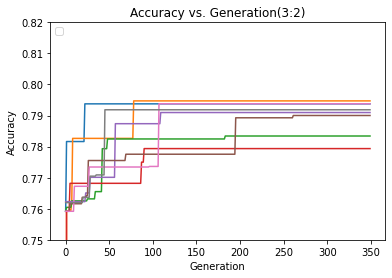

In [21]:
fig, ax = plt.subplots()
ax.plot([x for x in range(350)],history1[0])
ax.plot([x for x in range(350)],history1[1])
ax.plot([x for x in range(350)],history1[2])
ax.plot([x for x in range(350)],history1[3])
ax.plot([x for x in range(350)],history1[4])
ax.plot([x for x in range(350)],history1[5])
ax.plot([x for x in range(350)],history1[6])
ax.plot([x for x in range(350)],history1[7])
#ax.plot([x for x in range(300)],history[8])
ax.legend(loc = 'upper left')
plt.title("Accuracy vs. Generation(3:2)")
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.82)
plt.show()

In [0]:
weight1 = copy.deepcopy(weight1_f)
bias1 = copy.deepcopy(bias1_f)
weight2 = copy.deepcopy(weight2_f)
bias2 = copy.deepcopy(bias2_f)
velocity = copy.deepcopy(velocity_f)
local_optimal = copy.deepcopy(local_optimal_f)
local_optimal_score = copy.deepcopy(local_optimal_score_f)
global_optimal = copy.deepcopy(global_optimal_f)
global_optimal_score = copy.deepcopy(global_optimal_score_f)
#weight1

In [24]:
p1 = [weight1[0],bias1[0],weight2[0],bias2[0]]
p2 = [weight1[7],bias1[7],weight2[7],bias2[7]]
res = distance(p1,p2)
res

8.17035120768556

In [25]:
# Test with idea 1
history2 = [[],[],[],[],[],[],[],[],[]]
for itr in range(350):
    if global_optimal_score > 0.85:
        break
    temp_optimal = []
    temp_optimal_score = 0
    for i in range(8):
        cur_score1 = fitness_function(X, Y, weight1[i], bias1[i], weight2[i], bias2[i])
        cur_score2 = local_optimal_score[i]
        cur_score3 = global_optimal_score
        
        p1 = [weight1[i],bias1[i],weight2[i],bias2[i]]
        p2 = [local_optimal[i][0],local_optimal[i][1],local_optimal[i][2],local_optimal[i][3]]
        p3 = [global_optimal[0],global_optimal[1],global_optimal[2],global_optimal[3]]
        
        attractor1 = attractor(p1,p2,cur_score1,cur_score2)
        attractor2 = attractor(p1,p3,cur_score1,cur_score3)
        # print(attractor1,attractor2)
        # np.add  np.subtract *np.array
        # weight1 velocity update
        velocity[i][0] = (1 - attractor1 - attractor2)*np.array(velocity[i][0]) + attractor1 * np.subtract(
            np.array(local_optimal[i][0]), np.array(weight1[i]))
        velocity[i][0] = velocity[i][0] + attractor2 * \
            np.subtract(np.array(global_optimal[0]), np.array(weight1[i]))
        # bias1 velocity update
        velocity[i][1] = (1 - attractor1 - attractor2)*np.array(velocity[i][1]) + attractor1*  np.subtract(
            np.array(local_optimal[i][1]), np.array(bias1[i]))
        velocity[i][1] = velocity[i][1] + attractor2 * \
            np.subtract(np.array(global_optimal[1]), np.array(bias1[i]))
        # weight2 velocity update
        velocity[i][2] = (1 - attractor1 - attractor2)*np.array(velocity[i][2]) + attractor1*  np.subtract(
            np.array(local_optimal[i][2]), np.array(weight2[i]))
        velocity[i][2] = velocity[i][2] + attractor2*  \
            np.subtract(np.array(global_optimal[2]), np.array(weight2[i]))
        # bias2 velocity update
        velocity[i][3] = (1 - attractor1 - attractor2)*np.array(velocity[i][3]) + attractor1* np.subtract(
            np.array(local_optimal[i][3]), np.array(bias2[i]))
        velocity[i][3] = velocity[i][3] + attractor2*  \
            np.subtract(np.array(global_optimal[3]), np.array(bias2[i]))
        # update location
        weight1[i] += velocity[i][0]
        bias1[i] += velocity[i][1]
        weight2[i] += velocity[i][2]
        bias2[i] += velocity[i][3]
        # Get the fitness score for new location and check for optimal update
        cur_score = fitness_function(
            X, Y, weight1[i], bias1[i], weight2[i], bias2[i])
        if local_optimal_score[i] < cur_score:
            local_optimal_score[i] = cur_score
            local_optimal[i] = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
        if temp_optimal_score < cur_score:
            temp_optimal_score = cur_score
            temp_optimal = [weight1[i], bias1[i], weight2[i], bias2[i]]
    global_optimal = temp_optimal if global_optimal_score < temp_optimal_score else global_optimal
    global_optimal_score = temp_optimal_score if global_optimal_score < temp_optimal_score else global_optimal_score
    print(local_optimal_score)
    #history.append(global_optimal_score)
    for loc,val in enumerate(local_optimal_score):
        history2[loc].append(val)

[0.75918305, 0.75918305, 0.75918305, 0.7602887, 0.24081695, 0.75918305, 0.75918305, 0.7619779]
[0.75918305, 0.75918305, 0.75918305, 0.7602887, 0.24081695, 0.75918305, 0.75964373, 0.7619779]
[0.7593059, 0.75918305, 0.75918305, 0.7602887, 0.24081695, 0.7595516, 0.7603501, 0.7619779]
[0.7593059, 0.75918305, 0.75918305, 0.7602887, 0.75918305, 0.7595516, 0.7603501, 0.7619779]
[0.76676905, 0.7595823, 0.75918305, 0.7602887, 0.7595516, 0.7595516, 0.7603501, 0.7619779]
[0.76676905, 0.7595823, 0.75918305, 0.765387, 0.765387, 0.7595516, 0.7603501, 0.7619779]
[0.76676905, 0.7595823, 0.75918305, 0.765387, 0.765387, 0.7595516, 0.7603501, 0.76464987]
[0.76676905, 0.7595823, 0.75918305, 0.765387, 0.765387, 0.7595516, 0.7603501, 0.76464987]
[0.76676905, 0.7595823, 0.76799756, 0.77017814, 0.765387, 0.7595516, 0.7603501, 0.76464987]
[0.76676905, 0.7595823, 0.76799756, 0.77017814, 0.765387, 0.7595516, 0.7603501, 0.76464987]
[0.76676905, 0.7640049, 0.76799756, 0.77017814, 0.765387, 0.7595516, 0.7607801, 0.

No handles with labels found to put in legend.


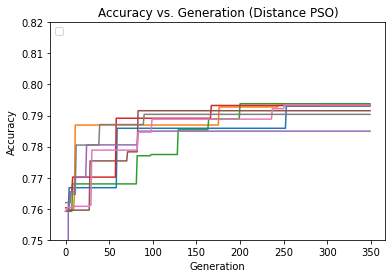

In [26]:
fig, ax = plt.subplots()
ax.plot([x for x in range(350)],history2[0])
ax.plot([x for x in range(350)],history2[1])
ax.plot([x for x in range(350)],history2[2])
ax.plot([x for x in range(350)],history2[3])
ax.plot([x for x in range(350)],history2[4])
ax.plot([x for x in range(350)],history2[5])
ax.plot([x for x in range(350)],history2[6])
ax.plot([x for x in range(350)],history2[7])
#ax.plot([x for x in range(300)],history[8])
ax.legend(loc = 'upper left')
plt.title("Accuracy vs. Generation (Distance PSO)")
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.82)
plt.show()

In [0]:
weight1 = copy.deepcopy(weight1_f)
bias1 = copy.deepcopy(bias1_f)
weight2 = copy.deepcopy(weight2_f)
bias2 = copy.deepcopy(bias2_f)
velocity = copy.deepcopy(velocity_f)
local_optimal = copy.deepcopy(local_optimal_f)
local_optimal_score = copy.deepcopy(local_optimal_score_f)
global_optimal = copy.deepcopy(global_optimal_f)
global_optimal_score = copy.deepcopy(global_optimal_score_f)
#weight1

In [0]:
# Implementation of Idea 2: create several subsets to hold individuals separately
# 8 individuals -> 3 grousp

# 3 Groups of size 3, which holds the information for each group
group_optimal = [None,None,None]
group_optimal_score = [0,0,0]



for count in range(8):
    cur_score = local_optimal_score[count]
    
    if cur_score > group_optimal_score[count%3]:
        group_optimal_score[count%3] = cur_score
        group_optimal[count%3] = [w1,b1,w2,b2]
    
    if cur_score > global_optimal_score:
        global_optimal_score = cur_score
        global_optimal = [w1,b1,w2,b2]


In [29]:
print(local_optimal_score)
print(group_optimal_score)
print(global_optimal_score)

[0.75918305, 0.24075553, 0.75918305, 0.24081695, 0.23955774, 0.2391892, 0.75918305, 0.7619779]
[0.75918305, 0.7619779, 0.75918305]
0.7619779


In [30]:
history3 = [[],[],[],[],[],[],[],[],[]]
for itr in range(350):
    if global_optimal_score > 0.85:
        break
    temp_group_optimal = [None,None,None]
    temp_group_optimal_score = [0,0,0]
    
    temp_global_optimal = []
    temp_global_optimal_score = 0
    
    for i in range(8):
        # np.add  np.subtract *np.array
        
        # weight1 velocity update
        velocity[i][0] = 0.5 * np.array(velocity[i][0]) + 0.1 * \
            np.subtract(np.array(local_optimal[i][0]), np.array(weight1[i]))
        velocity[i][0] = velocity[i][0] + 0.2 * \
            np.subtract(np.array(group_optimal[i%3][0]), np.array(weight1[i]))
        velocity[i][0] = velocity[i][0] + 0.2 * \
            np.subtract(np.array(global_optimal[0]), np.array(weight1[i]))
        
        # bias1 velocity update
        velocity[i][1] = 0.5 * np.array(velocity[i][1]) + 0.1*  \
            np.subtract(np.array(local_optimal[i][1]), np.array(bias1[i]))
        velocity[i][1] = velocity[i][1] + 0.2 * \
            np.subtract(np.array(group_optimal[i%3][1]), np.array(bias1[i]))
        velocity[i][1] = velocity[i][1] + 0.2 * \
            np.subtract(np.array(global_optimal[1]), np.array(bias1[i]))
        
        # weight2 velocity update
        velocity[i][2] = 0.3 * np.array(velocity[i][2]) + 0.1*  \
            np.subtract(np.array(local_optimal[i][2]), np.array(weight2[i]))
        velocity[i][2] = velocity[i][2] + 0.2*  \
            np.subtract(np.array(group_optimal[i%3][2]), np.array(weight2[i]))
        velocity[i][2] = velocity[i][2] + 0.2*  \
            np.subtract(np.array(global_optimal[2]), np.array(weight2[i]))
        
        # bias2 velocity update
        velocity[i][3] = 0.5 * np.array(velocity[i][3]) + 0.1* \
            np.subtract(np.array(local_optimal[i][3]), np.array(bias2[i]))
        velocity[i][3] = velocity[i][3] + 0.2*  \
            np.subtract(np.array(group_optimal[i%3][3]), np.array(bias2[i]))    
        velocity[i][3] = velocity[i][3] + 0.2*  \
            np.subtract(np.array(global_optimal[3]), np.array(bias2[i]))
        
        # update location
        weight1[i] += velocity[i][0]
        bias1[i] += velocity[i][1]
        weight2[i] += velocity[i][2]
        bias2[i] += velocity[i][3]
        
        # Get the fitness score for new location and check for optimal update
        cur_score = fitness_function(
            X, Y, weight1[i], bias1[i], weight2[i], bias2[i])
        if local_optimal_score[i] < cur_score:
            local_optimal_score[i] = cur_score
            local_optimal[i] = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
        if temp_group_optimal_score[i%3] < cur_score:
            temp_group_optimal_score[i%3] = cur_score
            temp_group_optimal[i%3] = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
        if temp_global_optimal_score < cur_score:
            temp_global_optimal_score = cur_score
            temp_global_optimal = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
    # Update the group information for each generation
    for index in range(3):
        if group_optimal_score[index] < temp_group_optimal_score[index]:
            group_optimal_score[index] = temp_group_optimal_score[index]
            group_optimal[index] = temp_group_optimal[index]
    
    # Update the overall information for each generation
    global_optimal = temp_global_optimal if global_optimal_score < temp_global_optimal_score else global_optimal
    global_optimal_score = temp_global_optimal_score if global_optimal_score < temp_global_optimal_score else global_optimal_score
    #print(group_optimal_score)
    print(local_optimal_score,itr)
    #history.append(global_optimal_score)
    for loc,val in enumerate(local_optimal_score):
        history3[loc].append(val)

[0.75918305, 0.75918305, 0.75918305, 0.75918305, 0.7597359, 0.75942874, 0.75918305, 0.7619779] 0
[0.75942874, 0.75918305, 0.75918305, 0.75918305, 0.7597359, 0.75942874, 0.75918305, 0.7619779] 1
[0.75942874, 0.75918305, 0.75918305, 0.75918305, 0.7837531, 0.75942874, 0.75918305, 0.7619779] 2
[0.78789926, 0.75918305, 0.75918305, 0.75918305, 0.7837531, 0.75942874, 0.75918305, 0.7619779] 3
[0.78789926, 0.75918305, 0.75924444, 0.7597052, 0.7837531, 0.75942874, 0.75918305, 0.76388204] 4
[0.78789926, 0.75918305, 0.75924444, 0.7597052, 0.7837531, 0.75942874, 0.75921375, 0.76388204] 5
[0.78789926, 0.7622236, 0.75924444, 0.7598894, 0.7837531, 0.75942874, 0.76446563, 0.76388204] 6
[0.78789926, 0.7622236, 0.75924444, 0.7598894, 0.7837531, 0.75942874, 0.76446563, 0.7904791] 7
[0.78789926, 0.7622236, 0.75924444, 0.7598894, 0.7837531, 0.76062655, 0.76446563, 0.7904791] 8
[0.78789926, 0.7622236, 0.75924444, 0.7598894, 0.7837531, 0.7644042, 0.76446563, 0.7904791] 9
[0.78789926, 0.7637592, 0.75924444, 0.

No handles with labels found to put in legend.


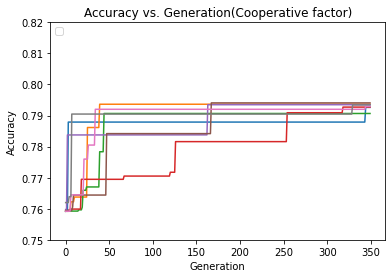

In [31]:
fig, ax = plt.subplots()
ax.plot([x for x in range(350)],history3[0])
ax.plot([x for x in range(350)],history3[1])
ax.plot([x for x in range(350)],history3[2])
ax.plot([x for x in range(350)],history3[3])
ax.plot([x for x in range(350)],history3[4])
ax.plot([x for x in range(350)],history3[5])
ax.plot([x for x in range(350)],history3[6])
ax.plot([x for x in range(350)],history3[7])
#ax.plot([x for x in range(300)],history[8])
ax.legend(loc = 'upper left')
plt.title("Accuracy vs. Generation(Cooperative factor)")
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.82)
plt.show()

In [0]:
# Implementation of Idea3
weight1 = copy.deepcopy(weight1_f)
bias1 = copy.deepcopy(bias1_f)
weight2 = copy.deepcopy(weight2_f)
bias2 = copy.deepcopy(bias2_f)
velocity = copy.deepcopy(velocity_f)
local_optimal = copy.deepcopy(local_optimal_f)
local_optimal_score = copy.deepcopy(local_optimal_score_f)
global_optimal = copy.deepcopy(global_optimal_f)
global_optimal_score = copy.deepcopy(global_optimal_score_f)
#weight1

In [33]:
history4 = [[],[],[],[],[],[],[],[],[]]
for itr in range(350):
    if global_optimal_score > 0.85:
        break
    temp_optimal = []
    temp_optimal_score = 0
    for i in range(8):
        # np.add  np.subtract *np.array
        # weight1 velocity update
        velocity[i][0] = 0.5*np.array(velocity[i][0]) + 0.1 * np.subtract(
            np.array(local_optimal[i][0]), np.array(weight1[i]))
        velocity[i][0] = velocity[i][0] + 0.4 * \
            np.subtract(np.array(global_optimal[0]), np.array(weight1[i]))
        # bias1 velocity update
        velocity[i][1] = 0.5*np.array(velocity[i][1]) + 0.1*  np.subtract(
            np.array(local_optimal[i][1]), np.array(bias1[i]))
        velocity[i][1] = velocity[i][1] + 0.4 * \
            np.subtract(np.array(global_optimal[1]), np.array(bias1[i]))
        # weight2 velocity update
        velocity[i][2] = 0.5*np.array(velocity[i][2]) + 0.1*  np.subtract(
            np.array(local_optimal[i][2]), np.array(weight2[i]))
        velocity[i][2] = velocity[i][2] + 0.4*  \
            np.subtract(np.array(global_optimal[2]), np.array(weight2[i]))
        # bias2 velocity update
        velocity[i][3] = 0.5*np.array(velocity[i][3]) + 0.1* np.subtract(
            np.array(local_optimal[i][3]), np.array(bias2[i]))
        velocity[i][3] = velocity[i][3] + 0.4*  \
            np.subtract(np.array(global_optimal[3]), np.array(bias2[i]))
        # update location
        weight1[i] += velocity[i][0]
        bias1[i] += velocity[i][1]
        weight2[i] += velocity[i][2]
        bias2[i] += velocity[i][3]
        # Get the fitness score for new location and check for optimal update
        cur_score = fitness_function(
            X, Y, weight1[i], bias1[i], weight2[i], bias2[i])
        if local_optimal_score[i] < cur_score:
            local_optimal_score[i] = cur_score
            local_optimal[i] = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
        if temp_optimal_score < cur_score:
            temp_optimal_score = cur_score
            temp_optimal = [weight1[i], bias1[i], weight2[i], bias2[i]]
    global_optimal = temp_optimal if global_optimal_score < temp_optimal_score else global_optimal
    global_optimal_score = temp_optimal_score if global_optimal_score < temp_optimal_score else global_optimal_score
    print(local_optimal_score,itr)
    #history.append(global_optimal_score)
    for loc,val in enumerate(local_optimal_score):
        history4[loc].append(val)

[0.75918305, 0.75918305, 0.75924444, 0.24081695, 0.24081695, 0.7593059, 0.75918305, 0.7713759] 0
[0.75918305, 0.7609951, 0.75924444, 0.24081695, 0.7594902, 0.7593059, 0.75918305, 0.7713759] 1
[0.75918305, 0.7609951, 0.75924444, 0.75936735, 0.7594902, 0.7593059, 0.7673219, 0.7713759] 2
[0.76335996, 0.7609951, 0.75924444, 0.75936735, 0.7594902, 0.7833231, 0.7719595, 0.776812] 3
[0.76335996, 0.7609951, 0.7781634, 0.75936735, 0.7594902, 0.7833231, 0.7719595, 0.776812] 4
[0.76335996, 0.7609951, 0.7781634, 0.75936735, 0.7594902, 0.7833231, 0.7719595, 0.776812] 5
[0.76335996, 0.7609951, 0.7781634, 0.75936735, 0.7594902, 0.7833231, 0.7719595, 0.776812] 6
[0.76335996, 0.7609951, 0.7781634, 0.75936735, 0.7594902, 0.7833231, 0.7719595, 0.776812] 7
[0.76335996, 0.7609951, 0.7781634, 0.75936735, 0.7594902, 0.7833231, 0.7719595, 0.776812] 8
[0.76335996, 0.7609951, 0.7781634, 0.7597359, 0.7594902, 0.7833231, 0.7719595, 0.776812] 9
[0.76335996, 0.7609951, 0.7781634, 0.77880836, 0.7594902, 0.7833231, 0

No handles with labels found to put in legend.


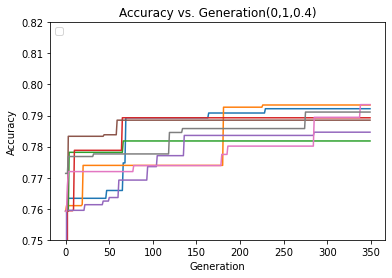

In [34]:
fig, ax = plt.subplots()
ax.plot([x for x in range(350)],history4[0])
ax.plot([x for x in range(350)],history4[1])
ax.plot([x for x in range(350)],history4[2])
ax.plot([x for x in range(350)],history4[3])
ax.plot([x for x in range(350)],history4[4])
ax.plot([x for x in range(350)],history4[5])
ax.plot([x for x in range(350)],history4[6])
ax.plot([x for x in range(350)],history4[7])
#ax.plot([x for x in range(300)],history[8])
ax.legend(loc = 'upper left')
plt.title("Accuracy vs. Generation(0,1,0.4)")
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.82)
plt.show()

In [0]:
weight1 = copy.deepcopy(weight1_f)
bias1 = copy.deepcopy(bias1_f)
weight2 = copy.deepcopy(weight2_f)
bias2 = copy.deepcopy(bias2_f)
velocity = copy.deepcopy(velocity_f)
local_optimal = copy.deepcopy(local_optimal_f)
local_optimal_score = copy.deepcopy(local_optimal_score_f)
global_optimal = copy.deepcopy(global_optimal_f)
global_optimal_score = copy.deepcopy(global_optimal_score_f)

In [37]:
history6 = [[],[],[],[],[],[],[],[],[]]
for itr in range(350):
    if global_optimal_score > 0.85:
        break
    temp_optimal = []
    temp_optimal_score = 0
    for i in range(8):
        # np.add  np.subtract *np.array
        # weight1 velocity update
        velocity[i][0] = 0.5*np.array(velocity[i][0]) + 0.4 * np.subtract(
            np.array(local_optimal[i][0]), np.array(weight1[i]))
        velocity[i][0] = velocity[i][0] + 0.1 * \
            np.subtract(np.array(global_optimal[0]), np.array(weight1[i]))
        # bias1 velocity update
        velocity[i][1] = 0.5*np.array(velocity[i][1]) + 0.4*  np.subtract(
            np.array(local_optimal[i][1]), np.array(bias1[i]))
        velocity[i][1] = velocity[i][1] + 0.1 * \
            np.subtract(np.array(global_optimal[1]), np.array(bias1[i]))
        # weight2 velocity update
        velocity[i][2] = 0.5*np.array(velocity[i][2]) + 0.4*  np.subtract(
            np.array(local_optimal[i][2]), np.array(weight2[i]))
        velocity[i][2] = velocity[i][2] + 0.1*  \
            np.subtract(np.array(global_optimal[2]), np.array(weight2[i]))
        # bias2 velocity update
        velocity[i][3] = 0.5*np.array(velocity[i][3]) + 0.4* np.subtract(
            np.array(local_optimal[i][3]), np.array(bias2[i]))
        velocity[i][3] = velocity[i][3] + 0.1*  \
            np.subtract(np.array(global_optimal[3]), np.array(bias2[i]))
        # update location
        weight1[i] += velocity[i][0]
        bias1[i] += velocity[i][1]
        weight2[i] += velocity[i][2]
        bias2[i] += velocity[i][3]
        # Get the fitness score for new location and check for optimal update
        cur_score = fitness_function(
            X, Y, weight1[i], bias1[i], weight2[i], bias2[i])
        if local_optimal_score[i] < cur_score:
            local_optimal_score[i] = cur_score
            local_optimal[i] = [weight1[i], bias1[i], weight2[i], bias2[i]]
    
        if temp_optimal_score < cur_score:
            temp_optimal_score = cur_score
            temp_optimal = [weight1[i], bias1[i], weight2[i], bias2[i]]
    global_optimal = temp_optimal if global_optimal_score < temp_optimal_score else global_optimal
    global_optimal_score = temp_optimal_score if global_optimal_score < temp_optimal_score else global_optimal_score
    print(local_optimal_score,itr)
    #history.append(global_optimal_score)
    for loc,val in enumerate(local_optimal_score):
        history6[loc].append(val)

[0.7597052, 0.77162164, 0.75918305, 0.24081695, 0.75918305, 0.24081695, 0.7632985, 0.7662162] 0
[0.7597052, 0.77162164, 0.75918305, 0.75918305, 0.75918305, 0.24081695, 0.7632985, 0.7662162] 1
[0.7597052, 0.77162164, 0.75918305, 0.7835688, 0.75918305, 0.76802826, 0.7632985, 0.7662162] 2
[0.7597052, 0.77162164, 0.75918305, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 3
[0.76320636, 0.77162164, 0.7750614, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 4
[0.76320636, 0.77162164, 0.7750614, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 5
[0.76320636, 0.77162164, 0.7750614, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 6
[0.76385134, 0.78200245, 0.7750614, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 7
[0.76385134, 0.78200245, 0.7750614, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 8
[0.76385134, 0.78200245, 0.7750614, 0.7835688, 0.75918305, 0.76802826, 0.76655406, 0.7662162] 9
[0.76385134, 0.78200245, 0.7750614, 0.783

No handles with labels found to put in legend.


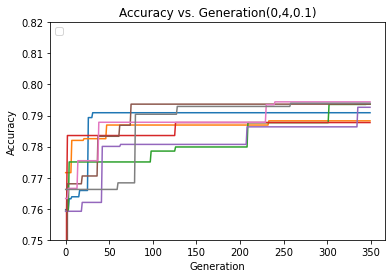

In [38]:
fig, ax = plt.subplots()
ax.plot([x for x in range(350)],history6[0])
ax.plot([x for x in range(350)],history6[1])
ax.plot([x for x in range(350)],history6[2])
ax.plot([x for x in range(350)],history6[3])
ax.plot([x for x in range(350)],history6[4])
ax.plot([x for x in range(350)],history6[5])
ax.plot([x for x in range(350)],history6[6])
ax.plot([x for x in range(350)],history6[7])
#ax.plot([x for x in range(300)],history[8])
ax.legend(loc = 'upper left')
plt.title("Accuracy vs. Generation(0,4,0.1)")
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.82)
plt.show()

In [0]:
# history1, hostory2 ,history3

l1 = []
l2 = []
l3 = []

for index in range(len(history1[0])):
  cur = 0
  for i in range(8):
    cur += history1[i][index]
  l1.append(cur / 8)

for index in range(len(history2[0])):
  cur = 0
  for i in range(8):
    cur += history2[i][index]
  l2.append(cur / 8)

for index in range(len(history3[0])):
  cur = 0
  for i in range(8):
    cur += history3[i][index]
  l3.append(cur / 8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


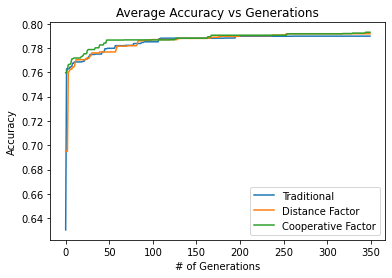

In [46]:
fig, ax = plt.subplots()
ax.plot([x for x in range(0,350)],l1,label = "Traditional")
ax.plot([x for x in range(0,350)],l2, label = "Distance Factor")
ax.plot([x for x in range(0,350)],l3, label = "Cooperative Factor")
ax.legend(loc = 'bottom right')
plt.title("Average Accuracy vs Generations")
plt.xlabel("# of Generations")
plt.ylabel("Accuracy")
plt.show()